
Tutorial link: https://www.youtube.com/watch?v=_lR3RjvYvF4&list=PLeo1K3hjS3uuvuAXhYjV2lMEShq2UYSwX&index=8

In [1]:
import spacy

### Split into token

In [2]:
nlp = spacy.blank("en")

doc = nlp("Dr. Strange loves pav bhaji of umbai as it costs only $2 per plate.")
doc1 = nlp('''"Let's go to N.Y.!"''')

for token in doc1:
    print(token)

"
Let
's
go
to
N.Y.
!
"


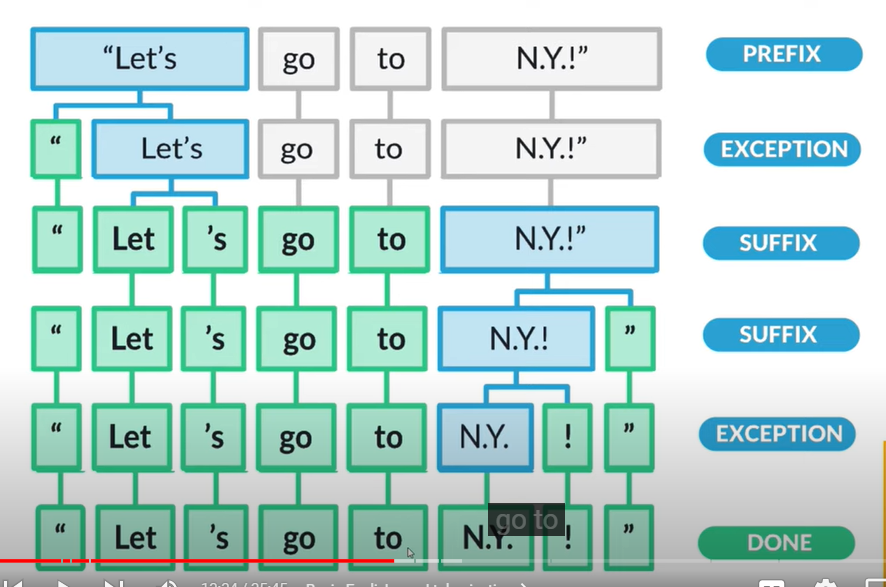

In [3]:
doc[1:5]

Strange loves pav bhaji

In [4]:
type(doc)

spacy.tokens.doc.Doc

In [5]:
type(token)

spacy.tokens.token.Token

In [6]:
doc = nlp("Tony gave two $ to Peter.")

### Looking into type of tokens

In [7]:
token0 = doc[0]
token0

Tony

In [8]:
token0.like_num # "Tony" is not the num

False

In [9]:
token2 = doc[2]
token2

two

In [10]:
token2.like_num # "Two" is a num

True

In [11]:
token3 = doc[3]
token3

$

In [12]:
token3.is_currency # "$" is a sign of currency

True

In [13]:
for token in doc:
    print(token, "==>", "index: ", token.i,
         "is_alpha: ", token.is_alpha,
         "is_punct: ", token.is_punct,
         "like_num: ", token.like_num,
         "is_currency: ", token.is_currency,
         )

Tony ==> index:  0 is_alpha:  True is_punct:  False like_num:  False is_currency:  False
gave ==> index:  1 is_alpha:  True is_punct:  False like_num:  False is_currency:  False
two ==> index:  2 is_alpha:  True is_punct:  False like_num:  True is_currency:  False
$ ==> index:  3 is_alpha:  False is_punct:  False like_num:  False is_currency:  True
to ==> index:  4 is_alpha:  True is_punct:  False like_num:  False is_currency:  False
Peter ==> index:  5 is_alpha:  True is_punct:  False like_num:  False is_currency:  False
. ==> index:  6 is_alpha:  False is_punct:  True like_num:  False is_currency:  False


### Find the emails in .txt file

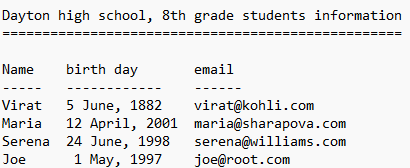

In [32]:
with open("students.txt") as f:
    text = f.readlines()
text

['Dayton high school, 8th grade students information\n',
 '==================================================\n',
 '\n',
 'Name\tbirth day   \temail\n',
 '-----\t------------\t------\n',
 'Virat   5 June, 1882    virat@kohli.com\n',
 'Maria\t12 April, 2001  maria@sharapova.com\n',
 'Serena  24 June, 1998   serena@williams.com \n',
 'Joe      1 May, 1997    joe@root.com\n',
 '\n',
 '\n',
 '\n']

In [33]:
text = ' '.join(text)
text

'Dayton high school, 8th grade students information\n ==================================================\n \n Name\tbirth day   \temail\n -----\t------------\t------\n Virat   5 June, 1882    virat@kohli.com\n Maria\t12 April, 2001  maria@sharapova.com\n Serena  24 June, 1998   serena@williams.com \n Joe      1 May, 1997    joe@root.com\n \n \n \n'

In [34]:
doc = nlp(text)

In [35]:
emails = []
for token in doc:
    if token.like_email:
        emails.append(token.text)
emails

['virat@kohli.com',
 'maria@sharapova.com',
 'serena@williams.com',
 'joe@root.com']

### Tokenise a sentence in Malay (Malaysia's National language)

In [36]:
nlp_ms = spacy.blank("ms")

In [49]:
doc = nlp_ms("Saya kasih kamu RM dua puluh")

for token in doc:
    print(token, token.is_currency, token.like_num)

Saya False False
kasih False False
kamu False False
RM True False
dua False True
puluh False True


### Adding special case tokenization rules

In [51]:
doc = nlp("gimme double cheese extra large healthy pizza")

tokens = [token.text for token in doc]
tokens

['gimme', 'double', 'cheese', 'extra', 'large', 'healthy', 'pizza']

In [53]:
from spacy.symbols import ORTH

nlp.tokenizer.add_special_case("gimme", [
    {ORTH: 'gim'},
    {ORTH: 'me'}
])

doc = nlp("gimme double cheese extra large healthy pizza")

tokens = [token.text for token in doc]
tokens
    

['gim', 'me', 'double', 'cheese', 'extra', 'large', 'healthy', 'pizza']

### Blank NPL vs Adding Sentencizer into pipeline

In [54]:
doc = nlp("Dr. Strange loves pav bhaiji of mumbai. Hulk loves chat of delhi")

for sentence in doc.sents:
    print(sentence)

ValueError: [E030] Sentence boundaries unset. You can add the 'sentencizer' component to the pipeline with: `nlp.add_pipe('sentencizer')`. Alternatively, add the dependency parser or sentence recognizer, or set sentence boundaries by setting `doc[i].is_sent_start`.

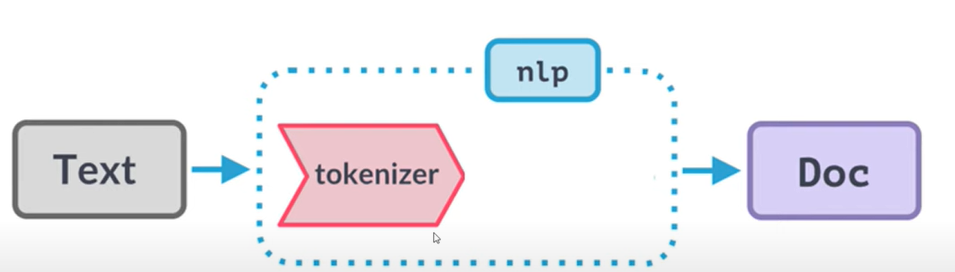

In [56]:
nlp.add_pipe('sentencizer') # sentencizer into pipeline

In [57]:
nlp.pipe_names

['sentencizer']

In [58]:
doc = nlp("Dr. Strange loves pav bhaiji of mumbai. Hulk loves chat of delhi")

for sentence in doc.sents:
    print(sentence)

Dr. Strange loves pav bhaiji of mumbai.
Hulk loves chat of delhi
